### Importing Libraries

To work with data and create visualizations, we will import the following libraries:

- **`pandas`**: A powerful library for data manipulation and analysis, providing data structures like DataFrames.
- **`numpy`**: A library for numerical operations, useful for working with arrays and performing mathematical computations.
- **`matplotlib.pyplot`**: A plotting library for creating a variety of static, animated, and interactive plots.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Generating Sensor Data

The `generate_sensor_data` function creates synthetic sensor data to simulate distance measurements at various angles around a vehicle. This data can be used for testing obstacle detection and navigation algorithms.

#### Parameters:

- **`num_samples`**: Specifies the number of data samples to generate. Default is 100.
- **`num_angles`**: Specifies the number of angles at which measurements are taken. Default is 36, representing measurements every 10 degrees.

#### Functionality:

1. **Base Distances**: Initially generates random distance measurements representing a clear path, ranging from 5 to 20 meters.

2. **Obstacles**: Randomly adds obstacles to the base distances. Each obstacle has a starting angle, width, and distance. The obstacle distance is used to update the base distances at the corresponding angles.

3. **Data Frame**: The function compiles the generated data into a DataFrame, with columns representing distance measurements at different angles.

This function is useful for creating synthetic sensor data to test and develop algorithms for obstacle detection and navigation systems.


In [7]:
def generate_sensor_data(num_samples=100, num_angles=36):
    data = []
    for _ in range(num_samples):
        # Generate base distances (clear path)
        base_distances = np.random.uniform(5, 20, num_angles)
        
        # Add random obstacles
        num_obstacles = np.random.randint(1, 4)
        for _ in range(num_obstacles):
            start_angle = np.random.randint(0, num_angles)
            width = np.random.randint(1, 5)
            obstacle_distance = np.random.uniform(1, 5)
            
            for i in range(width):
                angle = (start_angle + i) % num_angles
                base_distances[angle] = min(base_distances[angle], obstacle_distance)
        
        data.append(base_distances)
    
    # Create DataFrame
    columns = [f'angle_{i*10}' for i in range(num_angles)]
    df = pd.DataFrame(data, columns=columns)
    
    return df

### Generating and Saving Sensor Data

We will generate synthetic sensor data using the `generate_sensor_data` function and save it to a CSV file. This data can then be used for testing or further analysis.

1. **Generate Sensor Data**: We call the `generate_sensor_data` function to create a DataFrame with simulated distance measurements.

2. **Save to CSV**: The generated sensor data is saved to a CSV file named `sensor_data.csv`.

3. **Print Confirmation**: The code prints a confirmation message and displays the first few rows of the DataFrame to verify the data.


### output~ 
**Sample Sensor Data Generated and Saved to 'sensor_data.csv':**

|   angle_0  |  angle_10 |  angle_20 |  angle_30 |  angle_40 |  angle_50 |  angle_60 |  angle_70 |  angle_80 |  angle_90 |  ...  | angle_260 | angle_270 | angle_280 | angle_290 | angle_300 | angle_310 | angle_320 | angle_330 | angle_340 | angle_350 |
|:----------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:-----:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
| 19.106723  | 12.204975 |  9.924941 | 10.202958 | 12.601115 |  5.032241 |  6.936449 |  6.189466 | 10.845617 |  4.319982 |  ...  | 18.749456 | 15.390538 |  8.476463 |  5.821442 | 12.523145 | 13.963118 |  3.117508 |  3.117508 |  3.117508 | 11.102809 |
|  6.516019  | 18.249408 | 12.264672 |  6.553871 |  7.306063 |  1.675311 | 14.229860 | 14.495530 |  8.274476 | 15.942900 |  ...  | 17.146827 |  6.485756 |  5.643579 | 16.515625 | 11.210180 | 14.298087 | 11.774644 |  9.548669 | 18.241186 | 11.585827 |
| 11.131329  |  8.318122 | 11.061053 | 16.464692 | 14.937967 | 17.578045 |  9.377476 | 16.473487 |  9.358224 | 19.763973 |  ...  |  9.351002 | 13.956866 | 13.930973 | 10.412595 | 10.629969 |  5.624822 | 11.601764 | 17.827302 | 13.930973 | 17.827302 |
|  9.142805  | 11.296336 |  8.122534 |  8.850463 | 18.081943 |  5.016470 | 14.844319 | 16.188902 |  5.595395 | 19.578815 |  ...  |  1.939238 | 16.848291 |  9.413404 | 16.025281 | 12.674775 |  5.176693 | 11.582535 | 19.786507 | 15.351370 | 13.543153 |
|  5.390991  | 12.941128 | 13.702216 | 12.052826 |  7.302909 |  9.657516 | 11.176505 | 17.832079 | 14.720326 | 18.160416 |  ...  | 15.750048 |  8.038675 | 14.286584 | 16.771078 | 16.810633 | 10.817161 | 10.112175 |  1.937194 |  6.881237 | 14.648845 |

**Note:** Output is truncated. View the full dataset in a text editor or as a scrollable element.


In [8]:

# Generate and save sensor data
sensor_data = generate_sensor_data()
sensor_data.to_csv('sensor_data.csv', index=False)
print("Sample sensor data generated and saved to 'sensor_data.csv'")
print(sensor_data.head())


Sample sensor data generated and saved to 'sensor_data.csv'
     angle_0   angle_10   angle_20   angle_30   angle_40   angle_50  \
0  19.106723  12.204975   9.924941  10.202958  12.601115   5.032241   
1   6.516019  18.249408  12.264672   6.553871   7.306063   1.675311   
2  11.131329   8.318122  11.061053  16.464692  14.937967  17.578045   
3   9.142805  11.296336   8.122534   8.850463  18.081943   5.016470   
4   5.390991  12.941128  13.702216  12.052826   7.302909   9.657516   

    angle_60   angle_70   angle_80   angle_90  ...  angle_260  angle_270  \
0   6.936449   6.189466  10.845617   4.319982  ...  18.749456  15.390538   
1  14.229860  14.495530   8.274476  15.942900  ...  17.146827   6.485756   
2   9.377476  16.473487   9.358224  19.763973  ...   9.351002  13.956866   
3  14.844319  16.188902   5.595395  19.578815  ...   1.939238  16.848291   
4  11.176505  17.832079  14.720326  18.160416  ...  15.750048   8.038675   

   angle_280  angle_290  angle_300  angle_310  angle_320

### ObstacleDetector Class

The `ObstacleDetector` class is designed to identify and analyze obstacles based on sensor data. It includes methods for detecting obstacles, finding the nearest obstacle, and processing sensor data.

#### Methods:

- **`__init__(self, distance_threshold=2.0, angle_increment=10)`**: Initializes the `ObstacleDetector` with a distance threshold and angle increment.
  - **`distance_threshold`**: The minimum change in distance required to consider it an obstacle.
  - **`angle_increment`**: The angle between measurements in degrees.

- **`detect_obstacles(self, sensor_data)`**: Detects obstacles from the sensor data.
  - **`sensor_data`**: A list or array of distance measurements.
  - **Returns**: A list of tuples where each tuple contains the angle and distance of detected obstacles.

- **`nearest_obstacle(self, obstacles)`**: Finds the nearest obstacle from the detected obstacles.
  - **`obstacles`**: A list of tuples representing detected obstacles.
  - **Returns**: A tuple containing the angle and distance of the nearest obstacle, or `None` if no obstacles are detected.

- **`process_sensor_data(self, sensor_data)`**: Processes the sensor data to detect obstacles and find the nearest one.
  - **`sensor_data`**: A list or array of distance measurements.
  - **Returns**: A dictionary with the following keys:
    - `"obstacles"`: List of detected obstacles.
    - `"nearest_obstacle"`: Tuple of the nearest obstacle.
    - `"obstacle_count"`: Number of detected obstacles.

This class provides functionality for detecting and analyzing obstacles based on distance measurements, making it useful for applications in navigation and obstacle avoidance.


In [9]:
class ObstacleDetector:
    def __init__(self, distance_threshold=2.0, angle_increment=10):
        self.distance_threshold = distance_threshold
        self.angle_increment = angle_increment
     
    def detect_obstacles(self, sensor_data):
        obstacles = []
        for i in range(len(sensor_data)):
            if i == 0:
                prev_distance = sensor_data[-1]
            else:
                prev_distance = sensor_data[i-1]
            
            curr_distance = sensor_data[i]
            
            if abs(curr_distance - prev_distance) > self.distance_threshold:
                angle = i * self.angle_increment
                obstacles.append((angle, curr_distance))
        
        return obstacles
     
    def nearest_obstacle(self, obstacles):
        if not obstacles:
            return None, None
        
        nearest = min(obstacles, key=lambda x: x[1])
        return nearest
     
    def process_sensor_data(self, sensor_data):
        obstacles = self.detect_obstacles(sensor_data)
        nearest = self.nearest_obstacle(obstacles)
        
        return {
            "obstacles": obstacles,
            "nearest_obstacle": nearest,
            "obstacle_count": len(obstacles)
        }


### Visualizing Sensor Data

The `visualize_sensor_data` function creates a polar plot to visualize sensor data, detected obstacles, and the nearest obstacle. This helps in understanding the distribution of obstacles around a vehicle.

#### Parameters:

- **`sensor_data`**: A list or array of distance measurements at different angles.
- **`obstacles`**: A list of tuples representing detected obstacles, where each tuple contains the angle and distance of the obstacle.
- **`nearest_obstacle`**: A tuple representing the nearest obstacle, containing the angle and distance. If no obstacles are detected, this can be `None`.

#### Functionality:

1. **Polar Plot**: Creates a polar plot where the angles are on the angular axis and distances are on the radial axis.

2. **Plot Sensor Data**: Plots the sensor data as a line on the polar plot.

3. **Plot Obstacles**: Marks detected obstacles with red dots on the plot.

4. **Highlight Nearest Obstacle**: Highlights the nearest obstacle with a green dot, if any.

5. **Adjust Plot Settings**: 
   - Sets the zero angle location to North (`'N'`).
   - Reverses the direction of angles to be clockwise.
   - Adjusts the radial limits based on the sensor data.
   - Adds a title and legend for clarity.

6. **Display Plot**: Shows the plot with the visual representation of the sensor data and obstacles.

This function is useful for visualizing how obstacles are distributed around a vehicle and identifying the closest obstacle.


In [10]:


def visualize_sensor_data(sensor_data, obstacles, nearest_obstacle):
    angles = np.arange(0, len(sensor_data) * 10, 10)
    
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    ax.plot(np.deg2rad(angles), sensor_data)
    
    obstacle_angles = [np.deg2rad(obs[0]) for obs in obstacles]
    obstacle_distances = [obs[1] for obs in obstacles]
    ax.scatter(obstacle_angles, obstacle_distances, c='red', s=50, label='Obstacles')
    
    if nearest_obstacle:
        nearest_angle, nearest_distance = nearest_obstacle
        ax.scatter(np.deg2rad(nearest_angle), nearest_distance, c='green', s=100, label='Nearest Obstacle')
    
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_ylim(0, max(sensor_data) + 1)
    ax.set_title("Obstacle Detection Visualization")
    ax.legend()
    
    plt.show()


### Processing and Visualizing Sensor Data

The `process_and_visualize` function processes a sample of sensor data to detect obstacles and visualize the results. This function integrates the `ObstacleDetector` class and the `visualize_sensor_data` function to provide a comprehensive analysis and visualization of the data.

#### Parameters:

- **`sensor_data`**: A DataFrame containing sensor data with distance measurements at various angles.
- **`sample_index`**: The index of the sample in the DataFrame to process and visualize. Default is 0.

#### Functionality:

1. **Initialize Detector**: Creates an instance of the `ObstacleDetector` with a specified distance threshold.

2. **Process Sensor Data**: Uses the `process_sensor_data` method of the `ObstacleDetector` to detect obstacles and identify the nearest obstacle for the selected sample.

3. **Print Results**: Outputs the number of detected obstacles and details of the nearest obstacle to the console.

4. **Visualize Data**: Calls the `visualize_sensor_data` function to generate a polar plot of the sensor data, highlighting detected obstacles and the nearest obstacle.

This function is useful for analyzing a specific sample of sensor data and visualizing the results, helping to understand the distribution of obstacles and their proximity.


In [11]:
def process_and_visualize(sensor_data, sample_index=0):
    detector = ObstacleDetector(distance_threshold=2.0)
    result = detector.process_sensor_data(sensor_data.iloc[sample_index])
    
    print(f"Processing sample {sample_index}:")
    print(f"Detected obstacles: {result['obstacle_count']}")
    print(f"Nearest obstacle: {result['nearest_obstacle']}")
    
    visualize_sensor_data(sensor_data.iloc[sample_index], result["obstacles"], result["nearest_obstacle"])


### Load the sensor data


In [12]:

sensor_data = pd.read_csv('sensor_data.csv')


### Process and visualize the first sample

output~

- Processing sample 0:
- Detected obstacles: 24
- Nearest obstacle: (320, 3.1175078494318305)

and a plot is displayed

<ipython-input-9-649cd8671f3b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_distance = sensor_data[-1]
<ipython-input-9-649cd8671f3b>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_distance = sensor_data[i]
<ipython-input-9-649cd8671f3b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_distance = sensor_data[i-1]


Processing sample 0:
Detected obstacles: 24
Nearest obstacle: (320, 3.1175078494318305)


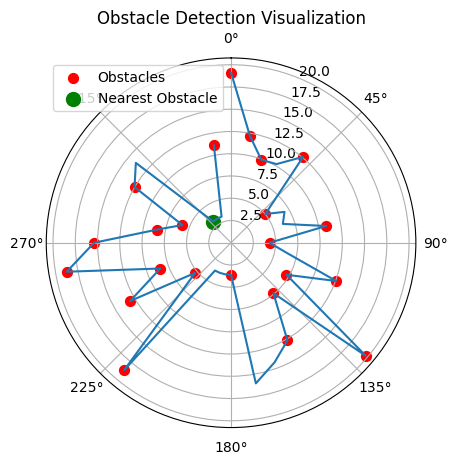

In [13]:

process_and_visualize(sensor_data, sample_index=0)
